#                   Churn Modelling Using Decision Tree Classifier

![Introduction](Intro.png)

## The problem
---
* The **churn rate** is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period.
* For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate.

### Churn modelling for a bank
---
Since banks record a range of customer information, this data can be used to classify the customers who are more likely to discontinue using bank's services than others.

This information can then be used to target a specific customer base and take actions to prevent the churn.

In [1]:
import pandas as pd

data = pd.read_csv("Churn_Modelling.csv")
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,Female,28,4,130142.79,1,1,0,38190.78,0


## The C.A.R.T. Algorithm

The **Classification and Regression Tree (C.A.R.T.)** algorithm is the most prevalent algorithm for building decision trees. It can be used for *classification* as well as *regression*.

We will use the DecisionTreeClassifier() class from the Sci-kit learn module which uses the C.A.R.T. algorithm to build a decision tree.

```python 
DecisionTreeClassifier(self, criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,max_leaf_nodes=None)
```

In [2]:
from sklearn.tree import DecisionTreeClassifier

### Steps

#### 1. Define problem and important variables

In this case the target variable will be **'Exited'**.


In [4]:
y = data.iloc[:,-1]

**'Row Number', 'Customer ID' and 'Surname'** seem less important for the given target, so we will not use them.

In [5]:
X = data.iloc[:,3:-1]

Since *Gender* is a categorical variable, let's convert it to a numeric variable so that all our variables are numeric.

In [6]:
gender = []
g = data['Gender']

for i in range(len(g)):
    if(g[i]=="Female"):
        gender.append(0)
    else:
        gender.append(1)
                
X['Gender'] = gender

#### 2. Select a splitting criterion and initialize the tree

The classes used for making a split can be random or can be done with some constraints.
There are two main criteria used for selecting a split.

##### Entropy and Information Gain

Entropy is calculated using the formula: ![EntropyFormula](entropy-formula.png)

Using entropy we calculate the information gain, using the formula: ![InfoGain](Entropy_gain_.png)

The feature with the **highest information gain is selected** as the decision node, and again information gain is calculated using the remaining features.

This process continues till all the values are covered or the specified covering criteria is achieved (step 5).


#####  Gini Impurity

Another criterion is Gini Impurity which calculates the impurity of the selected bifarcation threshold.

It is calculated using probabilities or proportions using the formula: ![GiniFormula](gini_formula.png)

The feature with the **lowest gini impurity is selected** as the decision node, and again the gini impurity is calculated using the remaining features.

This process continues till all the values are covered or the specified covering criteria is achieved (step 5).


While using information Gain as a criterion, we assume attributes to be categorical, and for gini index, attributes are assumed to be continuous.

#### 3. Split based on the selected splitting criterion.

For our example let us first use the **entropy** criterion.

We will do this changing the parameter ``` criterion = 'entropy'``` in the DecisionTreeClassifier class.

#### 4. Stop if classes cover all values or a pre-set threshold is satisfied

If all values are covered the tree might be **over-fitted**, so we can skip some values so that we can also accomodate a new value.

#### 5. Pruning

Pruning means trimming the decision tree for either faster performance or better accuracy.

##### Pre-pruning

We can mention a minimum split ratio or a maximum depth for the tree before building the tree on the training data. We will change the parameter ``` max_depth = 3```.
##### Post-pruning

We can edit the tree paramenters by  cross-validating different types of trees.



### Implementing the decision tree classifier

Let's implement the classifier on our training data.

We will build an object *classifier* and fit it to the data.

In [8]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)

Using the *fit* method we will train the classifier.

In [9]:
classifier.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Our Decision Tree is ready! 

## Visualisation

### Let's visualise our tree!

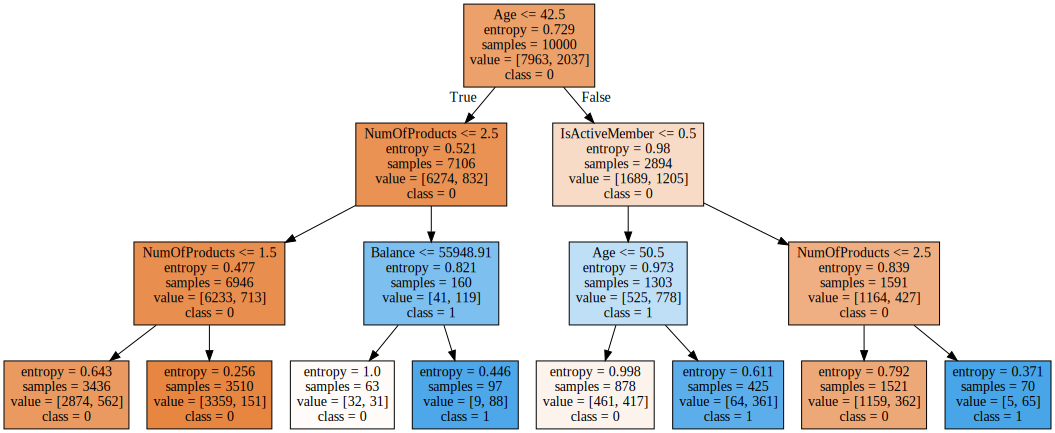

In [10]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

labels = list(X)

graph = Source(tree.export_graphviz(classifier, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

 ### Interactive Decision Tree
 
 Let's try to change different parameters and visualise the resulting tree.
 
 We can change the parameters using the widget below.

In [11]:
from ipywidgets import interactive

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels
      , class_names=['0','1','2']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…